In [327]:
import numpy as np
import pandas as pd

import dask.dataframe as dd

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ParameterGrid

from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer

from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import score

import random
ohe = OneHotEncoder()

from datetime import datetime

import pickle

from sklearn.decomposition import PCA

In [302]:
# n = 4317237 #number of records in file
# s = 10000 #desired sample size
# skip = sorted(random.sample(range(1,n),n-s))

# Read a random sample of s/n rows from csv

In [303]:
# test = pd.read_csv("master.csv", skiprows=skip)
# read_test = pd.read_csv("tb_master.csv")

In [304]:
# read_test = pd.read_csv("tb_master.csv")

In [305]:
# !unzip masterNoDemo.csv.zip

In [307]:
read_test = pd.read_csv("masterNoDemo.csv")

In [148]:
test['hour_slot'] = [1 if ((x>6) and (x<=10)) 
                     else 2 if ((x>10) and (x<=14)) 
                     else 3 if ((x>14) and (x<=18))
                     else 4 if ((x>18) and (x<=22))
                     else 5 if ((x>22) and (x<=2))
                     else 6
                     for x in read_test['hour']]

test = test.drop(['hour'], axis=1)
# read_test.rename(columns={'hour_slot':'hour'}, inplace=True)

In [328]:
test = read_test

In [329]:
# from datetime import datetime
test['date1'] = [datetime.strptime(x, '%m/%d/%Y') for x in test['date']]
test['date2'] = test['date1'].apply(lambda x: x.date())
test['day'] = test['date2'].apply(lambda x: x.weekday())

In [330]:
test['good_weather'] = np.where( ( (test['WindChillF'] < 85) & (test['WindChillF'] > 68 ) & (test['humidity'] < 80) & (test['precipMM'] < 2 ) ), 1, 0)
# 0 is Monday, 1 Tuesday and so on
# test = test[test['day'] < 4]
# df['points'] = np.where( ( (df['gender'] == 'male') & (df['pet1'] == df['pet2'] ) ) | ( (df['gender'] == 'female') & (df['pet1'].isin(['cat','dog'] ) ) ), 5, 0)

In [331]:
test['hour_slot'] = [1 if ((x>6) and (x<=10)) 
                     else 2 if ((x>10) and (x<=14)) 
                     else 3 if ((x>14) and (x<=18))
                     else 4 if ((x>18) and (x<=22))
                     else 5 if ((x>22) and (x<=2))
                     else 6
                     for x in test['hour']]

# test = test.drop(['hour'], axis=1)

In [211]:
# day_test = read_test[read_test.hour != 0]

In [212]:
# len(day_test.index)

In [213]:
# working_test.columns.values
# test.columns.values
# test.head()

In [332]:
droplist = list([
'Unnamed: 0',
# 'origin',
# 'geoid10_x',
# 'dest',
# 'date_x',
'date2',
'date',
'county_y',
# 'date_y',
# 'timeReform', 
# 'dateReform', 
# 'time',
# 'geoid10_y', 
'county_x',
# 'Census_tracts_x', 
# 'Census_tracts_y',
'dateReform', 
'timeReform',
'temp', 'windspeedMiles', 'precipMM', 'humidity', 'visibility',
'WindChillF', 'uvIndex', 'date1'])

test = test.drop(droplist, axis=1)
# Drop list of unnecessary columns

In [333]:
len(test.index)

4317238

In [158]:
# test.columns.values

In [334]:
def func_map(df, group_by):
    
    function_map = dict()
    
    sum_cols = ["Trip ID"]
    all_cols = list(df.columns.values)
    
    grpby_op = {}
    
    for c in all_cols:
        if c in group_by:
            pass
        elif c not in sum_cols:
            grpby_op[c] = 'mean'
        else:
            grpby_op[c] = 'sum'
            
    return grpby_op

grp_list = ['origin', 'dest', 'day', 'hour_slot'] #tb:removed 'hour', replace 'geoid10_x', 'geoid10_y',
grpby_op = func_map(test, grp_list)

test = test.groupby(grp_list, as_index=False).agg(grpby_op)
# test = test.drop(['geoid10_x', 'geoid10_y'], axis=1) #tb:not sure why this is here. 

In [335]:
test = test.drop(['origin', 'dest'], axis=1)

In [218]:
# test.head()
# test = test.fillna(0)

In [336]:
len(test.index)

1499524

In [337]:
test = test.fillna(0)

In [338]:
# equiv = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 
#          6:0, 7:1, 8:1, 9:1, 10:1, 11:2, 
#          12:2, 13:2, 14:2, 15:2, 16:2, 17:3, 
#          18:3, 19:3, 20:3, 21:3, 22:3, 23:0}

# working_test['time'] = working_test['hour'].map(lambda x:equiv[x])

In [339]:
def pipeline(df):
    
    df = pd.get_dummies(df,  columns=['day']) #Removed hour from this
  
    return df

In [340]:
def column_ot(df, column_name):
    
    percent_25 = np.percentile(df[column_name], 25)
    percent_75 = np.percentile(df[column_name], 75)
    
    iqr = percent_75 - percent_25
    lower_limit  = round(percent_25 - 1.5 * iqr, 2)
    upper_limit = round(percent_75 + 1.5 * iqr, 2)
    
    new_column = np.where(df[column_name] < lower_limit, lower_limit,
                           np.where(df[column_name] > upper_limit, upper_limit, df[column_name]))
     
    
    return new_column

def outlier_treatment(df, columns_needing_ot):
    for col in columns_needing_ot:
        df[col] = column_ot(df, col)

# returns df with updated columns

In [341]:
columns_needing_ot = ['Area_x', 'accounting_x', 'airport_x',
       'amusement_park_x', 'aquarium_x', 'art_gallery_x', 'atm_x',
       'bakery_x', 'bank_x', 'bar_x', 'beauty_salon_x', 'bicycle_store_x',
       'book_store_x', 'bowling_alley_x', 'bus_station_x', 'cafe_x',
       'car_dealer_x', 'car_rental_x', 'car_repair_x', 'car_wash_x',
       'casino_x', 'cemetery_x', 'church_x', 'city_hall_x',
       'clothing_store_x', 'convenience_store_x', 'dentist_x',
       'department_store_x', 'doctor_x', 'drugstore_x', 'electrician_x',
       'electronics_store_x', 'embassy_x', 'finance_x', 'fire_station_x',
       'florist_x', 'food_x', 'funeral_home_x', 'furniture_store_x',
       'gas_station_x', 'general_contractor_x',
       'grocery_or_supermarket_x', 'gym_x', 'hair_care_x',
       'hardware_store_x', 'health_x', 'hindu_temple_x',
       'home_goods_store_x', 'hospital_x', 'insurance_agency_x',
       'jewelry_store_x', 'laundry_x', 'lawyer_x', 'library_x',
       'liquor_store_x', 'local_government_office_x', 'locality_x',
       'locksmith_x', 'lodging_x', 'meal_delivery_x', 'meal_takeaway_x',
       'mosque_x', 'movie_rental_x', 'movie_theater_x',
       'moving_company_x', 'museum_x', 'natural_feature_x',
       'neighborhood_x', 'night_club_x', 'painter_x', 'park_x',
       'parking_x', 'pet_store_x', 'pharmacy_x', 'physiotherapist_x',
       'place_of_worship_x', 'plumber_x', 'police_x', 'political_x',
       'post_office_x', 'premise_x', 'primary_school_x',
       'real_estate_agency_x', 'restaurant_x', 'roofing_contractor_x',
       'rv_park_x', 'school_x', 'secondary_school_x', 'shoe_store_x',
       'shopping_mall_x', 'spa_x', 'stadium_x', 'storage_x', 'store_x',
       'subway_station_x', 'supermarket_x', 'synagogue_x', 'taxi_stand_x',
       'tourist_attraction_x', 'train_station_x', 'transit_station_x',
       'travel_agency_x', 'university_x', 'veterinary_care_x', 'zoo_x',
       'tot_POIs_x', 'pub_trans_POIs_x', 'dens_tot_POIs_x',
       'dens_pub_trans_POIs_x', 'Area_y',
       'accounting_y', 'airport_y', 'amusement_park_y', 'aquarium_y',
       'art_gallery_y', 'atm_y', 'bakery_y', 'bank_y', 'bar_y',
       'beauty_salon_y', 'bicycle_store_y', 'book_store_y',
       'bowling_alley_y', 'bus_station_y', 'cafe_y', 'car_dealer_y',
       'car_rental_y', 'car_repair_y', 'car_wash_y', 'casino_y',
       'cemetery_y', 'church_y', 'city_hall_y', 'clothing_store_y',
       'convenience_store_y', 'dentist_y', 'department_store_y',
       'doctor_y', 'drugstore_y', 'electrician_y', 'electronics_store_y',
       'embassy_y', 'finance_y', 'fire_station_y', 'florist_y', 'food_y',
       'funeral_home_y', 'furniture_store_y', 'gas_station_y',
       'general_contractor_y', 'grocery_or_supermarket_y', 'gym_y',
       'hair_care_y', 'hardware_store_y', 'health_y', 'hindu_temple_y',
       'home_goods_store_y', 'hospital_y', 'insurance_agency_y',
       'jewelry_store_y', 'laundry_y', 'lawyer_y', 'library_y',
       'liquor_store_y', 'local_government_office_y', 'locality_y',
       'locksmith_y', 'lodging_y', 'meal_delivery_y', 'meal_takeaway_y',
       'mosque_y', 'movie_rental_y', 'movie_theater_y',
       'moving_company_y', 'museum_y', 'natural_feature_y',
       'neighborhood_y', 'night_club_y', 'painter_y', 'park_y',
       'parking_y', 'pet_store_y', 'pharmacy_y', 'physiotherapist_y',
       'place_of_worship_y', 'plumber_y', 'police_y', 'political_y',
       'post_office_y', 'premise_y', 'primary_school_y',
       'real_estate_agency_y', 'restaurant_y', 'roofing_contractor_y',
       'rv_park_y', 'school_y', 'secondary_school_y', 'shoe_store_y',
       'shopping_mall_y', 'spa_y', 'stadium_y', 'storage_y', 'store_y',
       'subway_station_y', 'supermarket_y', 'synagogue_y', 'taxi_stand_y',
       'tourist_attraction_y', 'train_station_y', 'transit_station_y',
       'travel_agency_y', 'university_y', 'veterinary_care_y', 'zoo_y',
       'tot_POIs_y', 'pub_trans_POIs_y', 'dens_tot_POIs_y',
       'dens_pub_trans_POIs_y']

In [225]:
# test.to_csv('master.csv')
# !zip -r master.zip master.csv

# Export csv and zip it 

In [342]:
# test = test[test['Trip ID'] > 2] # for ride_number > 2 only

In [347]:
# test['hour'].unique()

In [348]:
test.to_csv('master_hourslot_all_days')

In [355]:
# !zip -r master_hourslot_all_days master_hourslot_all_days

In [354]:
X = test.drop(["Trip ID"], axis=1)

y = test["Trip ID"]

# Create X and y

In [277]:
y.describe()

count    224532.000000
mean         14.033790
std          33.129195
min           3.000000
25%           3.000000
50%           5.000000
75%          11.000000
max        1627.000000
Name: Trip ID, dtype: float64

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [279]:
X_train.shape, X_test.shape

((179625, 222), (44907, 222))

In [280]:
X_train = pipeline(X_train)
X_test = pipeline(X_test)

# Pipeline for one hot encoding

In [281]:
X_train.shape, X_test.shape

((179625, 225), (44907, 225))

In [282]:
outlier_treatment(X_train, columns_needing_ot)
outlier_treatment(X_test, columns_needing_ot)

#outlier treatment for POI data

In [283]:
# X_train.describe()

In [284]:
# import matplotlib.pyplot as plt
# plt.hist(test['Trip ID'], test['hour'])
# plt.show()

In [285]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [286]:
# y_train.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

In [287]:
pca = PCA(.95)
train_pca = pca.fit(train_scaled)

In [288]:
train_pca = pca.transform(train_scaled)
test_pca = pca.transform(test_scaled)

In [310]:
pd.DataFrame(train_pca).to_csv('train_pca')
pd.DataFrame(test_pca).to_csv('test_pca')

In [323]:
pd.DataFrame(y_train).to_csv('y_train')
pd.DataFrame(y_test).to_csv('y_test')

In [289]:
pca.n_components_

22

In [321]:
!zip -r train_export train_pca

  adding: train_pca (deflated 54%)


In [322]:
!zip -r test_export test_pca

  adding: test_pca (deflated 54%)


In [324]:
!zip -r y_train_export y_train

  adding: y_train (deflated 55%)


In [325]:
!zip -r y_test_export y_test

  adding: y_test (deflated 55%)


In [290]:
# MODEL 1 (MLP)

In [300]:
model1 = MLPRegressor(alpha=0.1, max_iter=1000)
model1.fit(train_pca, y_train)

MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [298]:
def cpc_loss(y_pred, y_true):
    
    assert(len(y_pred) == len(y_true))
#     print([(min(a,b)*2)/(a+b) for (a, b) in zip(y_pred, y_true)])
    
    for (a, b) in zip(y_pred[0:10], y_true[0:10]):
        print(a, b, (min(a,b)*2), (a+b))
    
    return np.mean([(min(a,b)*2)/(a+b) for (a, b) in zip(y_pred, y_true)])

In [292]:
y_train_pred = model1.predict(train_pca)
y_test_pred = model1.predict(test_pca)

In [299]:
cpc_loss(y_train_pred, y_train)

14.220302793389513 4 8 18.220302793389514
-0.693020196864909 7 -1.386040393729818 6.306979803135091
15.667652137903042 3 6 18.66765213790304
26.22814422696849 49 52.45628845393698 75.22814422696848
16.05355813233958 21 32.10711626467916 37.05355813233958
11.760645069301104 13 23.521290138602208 24.760645069301106
55.2960472982342 19 38 74.2960472982342
10.461815364194257 9 18 19.46181536419426
15.078160638224714 18 30.15632127644943 33.078160638224716
-4.560173548505057 5 -9.120347097010114 0.4398264514949428


1.351751595347416

In [293]:
train_cpc = cpc_loss(y_train_pred, y_train)
test_cpc = cpc_loss(y_test_pred, y_test)

In [294]:
train_cpc, test_cpc

(1.351751595347416, 0.496445495462588)

In [272]:
print((y_test_pred[1:10], list(y_test)[1:10]))

(array([ 5.11046852, -1.99780283, -6.30969372,  3.93700706,  2.95348089,
        7.68947365,  1.3127411 ,  4.9890607 , -5.06197073]), [1, 1, 2, 2, 1, 2, 1, 6, 1])


AttributeError: 'AxesSubplot' object has no attribute 'show'

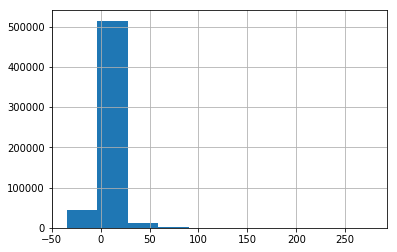

In [264]:
# (pd.Series(y_train_pred)).describe()

y = pd.Series(y_train_pred).hist()
# y.x_lab('')
y.show();

In [243]:
# mod1_train_acc = accuracy_score(y_train, model.predict(train_scaled))
# mod1_test_acc = accuracy_score(y_test, model.predict(test_scaled))
# mod1_y_train_pred = model.predict(train_scaled)
# mod1_y_test_pred = model.predict(test_scaled)

train_score = model1.score(train_pca, y_train)
test_score = model1.score(test_pca, y_test)

In [244]:
train_score, test_score

(0.4197386258294929, 0.44037011399450904)

In [245]:
gbdt_model2 = GradientBoostingRegressor()

In [326]:
# gbdt_model2.fit(train_pca, y_train)

In [77]:
# train_acc = accuracy_score(y_train, gbdt_model.predict(train_scaled))
# test_acc = accuracy_score(y_test, gbdt_model.predict(test_scaled))

# print("Train: {}, Test: {}".format(train_acc, test_acc))

In [78]:
# with open('log.txt', 'w+') as f:
#     f.write(train_acc, test_acc)

In [79]:
# accuracy_score(y_train, gbdt_model.predict(train_scaled))

In [26]:
y_train_pred = gbdt_model2.predict(train_scaled)
y_test_pred = gbdt_model2.predict(test_scaled)

In [81]:
rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))

In [82]:
rmse_train, rmse_test

(4.639807465709871, 48.98666923904631)

In [83]:
train_score = gbdt_model2.score(train_scaled, y_train)
test_score = gbdt_model2.score(test_scaled, y_test)

In [84]:
train_score, test_score

(0.9914827567708334, 0.4993220542418971)

In [17]:
# Adabooster

In [104]:
# class customMLPClassifer(MLPClassifier):
#     def resample_with_replacement(self, X_train, y_train, sample_weight):

#         # normalize sample_weights if not already
#         sample_weight = sample_weight / sample_weight.sum(dtype=np.float64)

#         X_train_resampled = np.zeros((len(X_train), len(X_train[0])), dtype=np.float32)
#         y_train_resampled = np.zeros((len(y_train)), dtype=np.int)
#         for i in range(len(X_train)):
#             # draw a number from 0 to len(X_train)-1
#             draw = np.random.choice(np.arange(len(X_train)), p=sample_weight)

#             # place the X and y at the drawn number into the resampled X and y
#             X_train_resampled[i] = X_train[draw]
#             y_train_resampled[i] = y_train[draw]

#         return X_train_resampled, y_train_resampled


#     def fit(self, X, y, sample_weight=None):
#         if sample_weight is not None:
#             X, y = self.resample_with_replacement(X, y, sample_weight)

#         return self._fit(X, y, incremental=(self.warm_start and
#                                             hasattr(self, "classes_")))

In [105]:
adabooster = AdaBoostRegressor()

In [106]:
adabooster.fit(train_scaled, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [107]:
adb_y_train_pred = adabooster.predict(train_scaled)
adb_y_test_pred = adabooster.predict(test_scaled)

In [108]:
rmse_train = sqrt(mean_squared_error(y_train, adb_y_train_pred))
rmse_test = sqrt(mean_squared_error(y_test, adb_y_test_pred))

In [109]:
train_score = adabooster.score(train_scaled, y_train)
test_score = adabooster.score(test_scaled, y_test)

In [110]:
train_score, test_score

(0.6203968220837198, 0.1506693536755579)